<a href="https://colab.research.google.com/github/Sivapriya27/Crime-Detection-Analysis/blob/main/crime_prediction_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

Loading the data

In [ ]:
df = pd.read_csv("../input/crime-in-vancouver/crime.csv")
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37292 entries, 0 to 37291
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TYPE           37292 non-null  object 
 1   YEAR           37292 non-null  int64  
 2   MONTH          37292 non-null  int64  
 3   DAY            37292 non-null  int64  
 4   HOUR           34681 non-null  float64
 5   MINUTE         34681 non-null  float64
 6   HUNDRED_BLOCK  37291 non-null  object 
 7   NEIGHBOURHOOD  34204 non-null  object 
 8   X              37291 non-null  float64
 9   Y              37291 non-null  float64
 10  Latitude       37291 non-null  float64
 11  Longitude      37291 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 3.4+ MB


In [ ]:
df.shape

(530652, 12)

<AxesSubplot:>

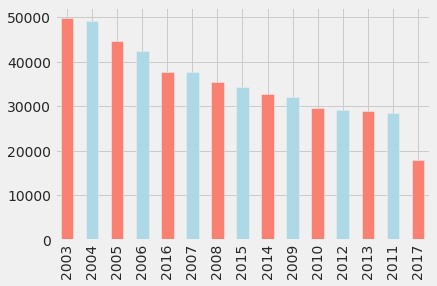

In [ ]:
df.YEAR.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [ ]:
df.isna().sum()


TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
MINUTE           54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
X                    0
Y                    0
Latitude             0
Longitude            0
dtype: int64

* # 2. Correlation Matrix**

<ipython-input-8-0fb0fbeef1f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


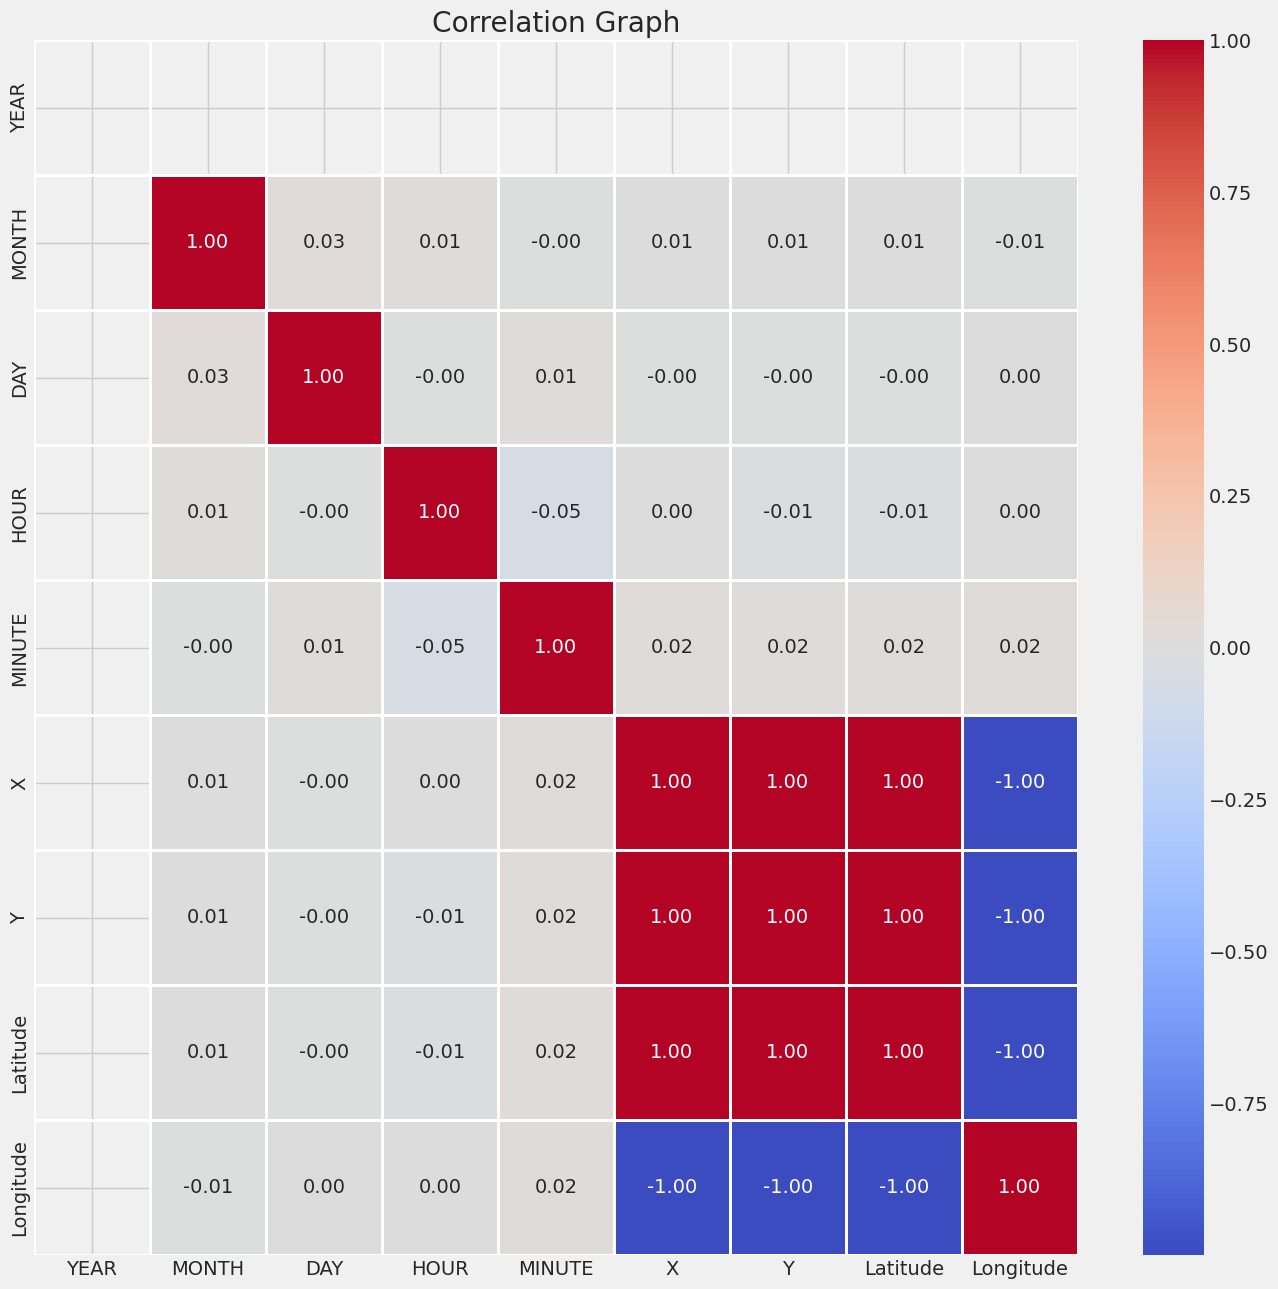

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f',  linewidths=.8, cmap='coolwarm');

 * # 3. Data Processing
Perform Feature Standerd Scalling

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

In [ ]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['YEAR', 'MONTH', 'DAY', 'MINUTE']
df[col_to_scale] = s_sc.fit_transform(df[col_to_scale])

In [ ]:
df.head()


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,-1.413036,-0.426745,-0.389525,16.0,-0.105329,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,-1.413036,-0.426745,-0.960912,15.0,0.166131,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,-1.413036,-0.720931,0.867527,16.0,1.251971,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,-1.413036,-0.720931,0.524695,11.0,-0.105329,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,-1.413036,-0.720931,-0.389525,17.0,1.523431,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


4. Applying machine learning algorithms

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score , classification_report
import seaborn as sns
classes=['healthy','Un-healthy']

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) 100:.2f}%")
       # recall=recall_score(y_train, pred)
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        sns.heatmap(confusion_matrix(y_test, pred), annot= True, cmap='YlGnBu',fmt = 'g')
        print(classification_report(y_test,pred))
        cm=(confusion_matrix(y_test,pred))
       # ax.xaxis.set_label_position('top')
        plt.tight_layout()
        plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        total = sum(sum(cm))
        acc = (cm[0, 0] + cm[1, 1]) / total
        sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
       # print(cm)

        FP = cm.sum(axis=0) - np.diag(cm)
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        FP = FP.astype(float)
        FN = FN.astype(float)
        TP = TP.astype(float)
        TN = TN.astype(float)

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        print('Sensitivity (TPR) : ',TPR)
        # Specificity or true negative rate
        TNR = TN/(TN+FP)
        print('Specificity (TNR) : ',TNR)
        # Overall accuracy
        print(" Overall accuracy")
        ACC = (TP+TN)/(TP+FP+FN+TN)
        print('Accuracy : ',ACC)
        print("Accuracy: {:.4f}".format(acc))
        print("Average Sensitivity: {:.4f}".format(sensitivity))
        print("Average Specificity: {:.4f}".format(specificity))
        print('\n')

        conf_matrix=cm
        print("=========================================")
        # save confusion matrix and slice into four pieces
        TP = conf_matrix[1][1]
        TN = conf_matrix[0][0]
        FP = conf_matrix[0][1]
        FN = conf_matrix[1][0]
        print('True Positives:', TP)
        print('True Negatives:', TN)
        print('False Positives:', FP)
        print('False Negatives:', FN)

        # calculate accuracy
        conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

        # calculate mis-classification
        conf_misclassification = 1- conf_accuracy

        # calculate the sensitivity
        conf_sensitivity = (TP / float(TP + FN))
        # calculate the specificity
        conf_specificity = (TN / float(TN + FP))

        # calculate precision
        conf_precision = (TN / float(TN + FP))
        # calculate f_1 score
        conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
        print('-'*50)
        print(f'Accuracy: {round(conf_accuracy,2)}')
        print(f'Mis-Classification: {round(conf_misclassification,2)}')
        print(f'Sensitivity: {round(conf_sensitivity,2)}')
        print(f'Specificity: {round(conf_specificity,2)}')
        print(f'Precision: {round(conf_precision,2)}')
        print(f'f_1 Score: {round(conf_f1,2)}')

SyntaxError: ignored

# Function to plot ROC and Precision Recall Curve for combination of all models


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('YEAR', axis=1)
y = df.YEAR

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

ValueError: could not convert string to float: 'Theft from Vehicle'

1. #  2. Decision Tree Classifier

In [ ]:
from sklearn.svm import SVC


svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0, probability=True)
svm_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Theft from Vehicle'

In [ ]:
print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

NameError: name 'print_score' is not defined

In [ ]:
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(hidden_layer_sizes=(10,50),momentum=0.9,solver='sgd',random_state=42)

NN.fit(X_train, y_train)

print_score(NN, X_train, y_train, X_test, y_test, train=True)
print_score(NN, X_train, y_train, X_test, y_test, train=False)

ValueError: could not convert string to float: 'Theft from Vehicle'